In [2]:
# Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Setting the random seed
np.random.seed(42)

In [4]:
# Creating the input array
X = np.array([[1, 0, 0, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

print('Input :\n', X)

# Shape of input
print('\nShape of Input :', X.shape)

Input :
 [[1 0 0 0]
 [1 0 1 1]
 [0 1 0 1]]

Shape of Input : (3, 4)


In [5]:
# Transpose
X = X.T
print('Input in matrix form :\n', X)

# Shape of matrix
print('\nShape of Input Matrix :\n', X.shape)

Input in matrix form :
 [[1 1 0]
 [0 0 1]
 [0 1 0]
 [0 1 1]]

Shape of Input Matrix :
 (4, 3)


In [6]:
# Creating the output array
y = np.array([[1], [1], [0]])

print('Actual Output :\n', y)

# Transpose of output
y = y.T
print('Matrix Output :\n', y)
print('\nShape of Output :', y.shape)

Actual Output :
 [[1]
 [1]
 [0]]
Matrix Output :
 [[1 1 0]]

Shape of Output : (1, 3)


In [7]:
# Defining the Neural Network Architecture
inputLayer_neurons = X.shape[0]
hiddenLayer_neurons = 3
outputLayer_neurons = 1

In [8]:
# Randomly initializing the weights
weights_input_hidden = np.random.uniform(size =
 (inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(size =
 (hiddenLayer_neurons, outputLayer_neurons))

In [9]:
# Checking the shape
print('Shape of weights_input_hidden :', weights_input_hidden.shape)
print('Shape of weights_hidden_output :', weights_hidden_output.shape)

Shape of weights_input_hidden : (4, 3)
Shape of weights_hidden_output : (3, 1)


In [10]:
# Defining the sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [11]:
# Hidden Layer Activation
hidden_layer_input = np.dot(weights_input_hidden.T, X)
hidden_layer_activation = sigmoid(hidden_layer_input)

In [12]:
# Calculating the output
output_layer_input = np.dot(weights_hidden_output.T, hidden_layer_activation)
output = sigmoid(output_layer_input)

In [13]:
# Getting the output
print(output)


[[0.68334694 0.72697078 0.71257368]]


In [14]:
# Calculating the error
error = y - output
print(error)

[[ 0.31665306  0.27302922 -0.71257368]]


In [15]:
# Rate of change of error w.r.t. output
error_wrt_output = -(y - output)
print(error_wrt_output)

[[-0.31665306 -0.27302922  0.71257368]]


In [16]:
# Rate of change of error w.r.t. Z2
output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
print(output_wrt_outputLayer_LinearTransform)

[[0.2163839  0.19848426 0.20481243]]


In [17]:
# Rate of change of Z2 w.r.t. weights between hidden and output layer
outputLayer_LinearTransform_wrt_weights = hidden_layer_activation

In [18]:
# Checking the shape of partial derivatives
error_wrt_output.shape,
output_wrt_outputLayer_LinearTransform.shape,
outputLayer_LinearTransform_wrt_weights.shape

(3, 3)

In [19]:
# Shape of weights of output layer
weights_hidden_output.shape

(3, 1)

In [20]:
# Rate of change of error w.r.t. weights between hidden and output layer
error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
)
error_wrt_weights_hidden_output.shape

(3, 1)

In [21]:
# Rate of change of Z2 w.r.t. hidden layer activations
hiddenLayer_LinearTransform_wrt_hiddenLayer_activations = weights_hidden_output

In [22]:
# Rate of change of Z1 w.r.t. weights between input and hidden layer
hiddenLayer_linearTransform_wrt_weights_input_hidden = X

In [23]:
# Checking the shapes of partial derivatives
print(
    error_wrt_output.shape,
    output_wrt_outputLayer_LinearTransform.shape,
    hiddenLayer_LinearTransform_wrt_hiddenLayer_activations.shape,
    hiddenLayer_linearTransform_wrt_weights_input_hidden.shape,
)


(1, 3) (1, 3) (3, 1) (4, 3)


In [24]:
# Rate of change of hidden layer activations w.r.t Z1
hiddenLayer_activations_wrt_hiddenLayer_LinearTransform = np.multiply(
    hidden_layer_activation, (1 - hidden_layer_activation)
)

In [25]:
# Rate of change of Z2 w.r.t hidden layer activations
outputLayer_LinearTransform_wrt_hiddenlayer_activations = weights_hidden_output

In [26]:
# Rate of change of error w.r.t. weights between input and hidden layer
errors_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_LinearTransform *
        np.dot(
            outputLayer_LinearTransform_wrt_hiddenlayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
)

In [27]:

# Defining the learning rate
lr = 0.01

In [28]:
# Updating the weights
weights_input_hidden -= lr * errors_wrt_weights_input_hidden
weights_hidden_output -= lr * error_wrt_weights_hidden_output

In [29]:
# Defining the Neural Network Architecture
inputLayer_neurons = X.shape[0]
hiddenLayer_neurons = 3
outputLayer_neurons = 1

# Randomly initializing the weights
weights_input_hidden = np.random.uniform(size =
 (inputLayer_neurons, hiddenLayer_neurons))
weights_hidden_output = np.random.uniform(size =
 (hiddenLayer_neurons, outputLayer_neurons))

# Defining the parameters
lr = 0.01
epochs = 10000

In [30]:
# Complete Processing

losses = []
for epoch in range(epochs):
  ## Forward Propogation

  # Hidden Layer Activation
  hidden_layer_input = np.dot(weights_input_hidden.T, X)
  hidden_layer_activation = sigmoid(hidden_layer_input)

  # Calculating the output
  output_layer_input = np.dot(weights_hidden_output.T, hidden_layer_activation)
  output = sigmoid(output_layer_input)

  ## Back Propogation

  # Calculating the error
  error = y - output

  # Calculating the rate of change of error
  # Rate of change of error w.r.t. output
  error_wrt_output = -(y - output)
  # Rate of change of error w.r.t. Z2
  output_wrt_outputLayer_LinearTransform = np.multiply(output, (1 - output))
  # Rate of change of Z2 w.r.t. weights between hidden and output layer
  outputLayer_LinearTransform_wrt_weights = hidden_layer_activation

  error_wrt_weights_hidden_output = np.dot(
    outputLayer_LinearTransform_wrt_weights,
    (error_wrt_output * output_wrt_outputLayer_LinearTransform).T,
  )

  outputLayer_LinearTransform_wrt_hiddenlayer_activations = weights_hidden_output
  hiddenLayer_LinearTransform_wrt_hiddenLayer_activations = np.multiply(
      hidden_layer_activation, (1 - hidden_layer_activation)
  )
  hiddenLayer_linearTransform_wrt_weights_input_hidden = X
  # Rate of change of error w.r.t. weights between input and hidden layer
  errors_wrt_weights_input_hidden = np.dot(
    hiddenLayer_linearTransform_wrt_weights_input_hidden,
    (
        hiddenLayer_activations_wrt_hiddenLayer_LinearTransform *
        np.dot(
            outputLayer_LinearTransform_wrt_hiddenlayer_activations,
            (output_wrt_outputLayer_LinearTransform * error_wrt_output),
        )
    ).T,
  )
  # Updating the weights
  weights_input_hidden -= lr * errors_wrt_weights_input_hidden
  weights_hidden_output -= lr * error_wrt_weights_hidden_output

  # printing the error
  epoch_loss = np.average(error)
  losses.append(epoch_loss)
  if epoch % 1000 == 0:
    print(f'Epoch: {epoch}, Loss: {epoch_loss}')

Epoch: 0, Loss: -0.019367335121663443
Epoch: 1000, Loss: 0.0023565294275328754
Epoch: 2000, Loss: -0.004430389812766444
Epoch: 3000, Loss: -0.012058056168522365
Epoch: 4000, Loss: -0.01275161055138844
Epoch: 5000, Loss: -0.0043397737005043124
Epoch: 6000, Loss: 0.004624904957632662
Epoch: 7000, Loss: 0.008466944507090476
Epoch: 8000, Loss: 0.009016343606186472
Epoch: 9000, Loss: 0.008253521971827965


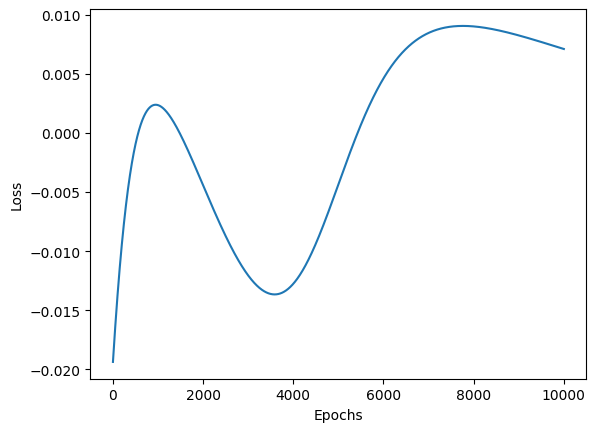

In [31]:
# Visual
plt.plot(np.arange(1, epochs+1), np.array(losses))
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()